In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop("Id" , axis=1 , inplace=True)

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

In [8]:
# seperate the x and y data
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [25]:
# prompt: generate the logistic regression model , train and test the model , return the classification report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# train the model
model = LogisticRegression()
model.fit(x_train,y_train)

# test the model
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      1.00      0.90         9
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [26]:
print("trainig accuracy" , model.score(x_train,y_train)*100)
print("testing accuracy" , model.score(x_test,y_test)*100)

trainig accuracy 96.42857142857143
testing accuracy 94.73684210526315


Text(50.722222222222214, 0.5, 'Truth')

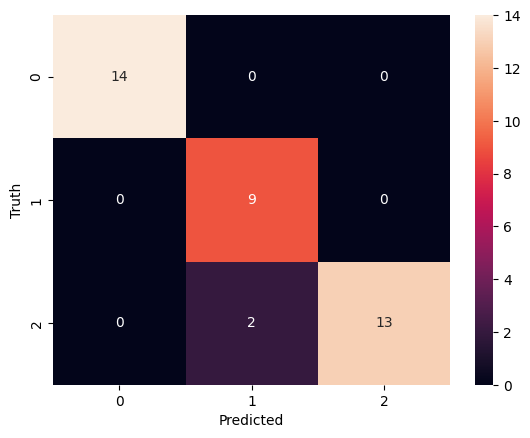

In [27]:
# prompt: draw the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
